# Project Description

The following research needs to be done for an online store: 

1. Prioritize the hypotheses using ICE and RICE frameworks.
2. Analyze the results of the conducted A/B test and give recommendations.

In [1]:
# importing libraries

import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
  
register_matplotlib_converters()

# Prioritization of hypotheses

In [2]:
# creating dataframe with hypotheses

hypotheses = pd.read_csv('hypothesis.csv')

In [3]:
# setting the column display width

pd.options.display.max_colwidth = 200

In [4]:
# displaying the 9 hypotheses

hypotheses

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


The hypotheses in English:

0. Add two new channels to attract traffic, which will allow to attract 30% more users;
1. Launch own delivery service, which will shorten the delivery time of orders;
2. Add product recommendation blocks to the website to increase conversion rate and average check;
3. Change the structure of categories, which will increase conversion, because users will find the desired product faster 8 3 3 3 8
4. Change the background color of the homepage to increase user engagement;
5. Add a page of customer reviews about the store, which will increase the number of orders;
6. Show banners with current promotions and sales on the homepage to increase conversion;
7. Add a subscription form to all main pages to build a customer base for email newsletters;
8. Launch a promotion to give a discount on customer's birthday.

In [5]:
# Applying ICE framework
hypotheses['ice_score'] = (hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts']).round()

In [6]:
# Sorting the hypotheses by ICE score

hypotheses.sort_values(by='ice_score', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0


In [7]:
# Applying RICE framework

hypotheses['rice_score'] = (
    (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts'])
    .round()
)

In [8]:
# Sorting the hypotheses by RICE score

hypotheses.sort_values(by='rice_score', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.0


## summary
The prioritization of hypotheses changed when RICE was applied - due to the wide coverage, hypotheses about subscription form and recommendation blocks took the 1st and 2nd places, respectively. At the same time, the set of hypotheses in the top 5 after applying both frameworks remained the same.

# A/B test analysis

In [9]:
# creating the dataset with orders

orders = pd.read_csv('orders.csv') 
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
# creating the dataset with visits

visitors = pd.read_csv('visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
# checking dataframe information

orders.info(), visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


(None, None)

In [12]:
# checking for missing values and duplicates in orders

orders.isna().sum(), orders.duplicated().sum()

(transactionId    0
 visitorId        0
 date             0
 revenue          0
 group            0
 dtype: int64,
 0)

In [13]:
# checking for missing values and duplicates in visitors

visitors.isna().sum(), visitors.duplicated().sum()

(date        0
 group       0
 visitors    0
 dtype: int64,
 0)

In [14]:
# setting the right format for columns with dates

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [15]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [16]:
# checking if groups A and B are equal in orders

display(orders[orders['group'] == 'A'].count())
orders[orders['group'] == 'B'].count()

transactionId    557
visitorId        557
date             557
revenue          557
group            557
dtype: int64

transactionId    640
visitorId        640
date             640
revenue          640
group            640
dtype: int64

In [17]:
# checking if there are users who got into both test groups 

visitors_grouped = orders.groupby('visitorId')['group'].nunique().reset_index()
visitors_w_two_groups = visitors_grouped[visitors_grouped['group'] == 2]
visitors_w_two_groups['group'].count()

58

The sizes of groups A and B in the order table do not match, and that there are 58 users who got into both test groups.

In [18]:
# checking the number of visitors in each group 

display(visitors.query('group == "A"')['visitors'].sum())
visitors.query('group == "B"')['visitors'].sum()

18736

18916

Let's assume that visitors from the visitors dataframe are unique. Note that the number of visitors in group B is larger than in group A by about 1%.

In [19]:
# aggregated tables with orders and visitors

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [20]:
# merging ordersAggregated and visitorsAggregated 

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [21]:
# cumulative revenue by group

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

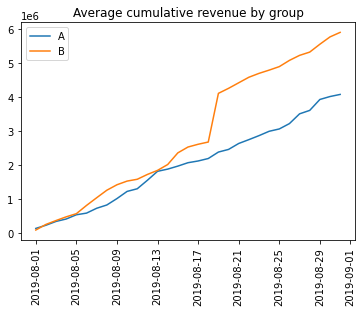

In [22]:
# visualizing cumulative revenue by group

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Average cumulative revenue by group')
plt.xticks(rotation=90)
plt.legend();

From about the second week of the test, group B took the lead and was in the lead until the end of the period under review. It is also worth noting the jump in group B revenue around August 19 - it may have been due to a surge.

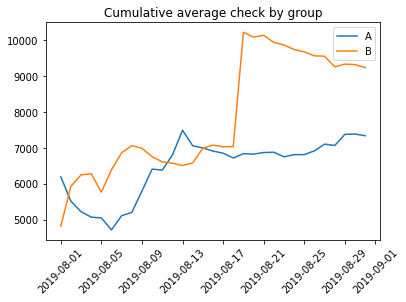

In [23]:
# visualizing cumulative average check by group

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative average check by group')
plt.xticks(rotation=45)
plt.legend();

According to the cumulative average check, we see that group B was in the lead throughout the test period, except for a short interval around August 13. Note also the surge in group B around August 19, after which the gap between the groups increased significantly. 

In [24]:
# graph of relative change in cumulative average check of group B to group A
mergedCumulativeRevenue = \
cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

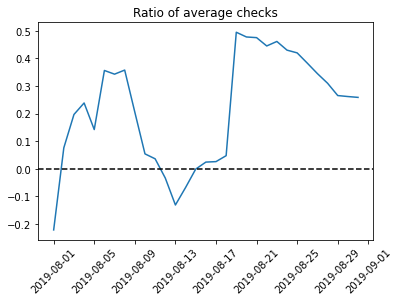

In [25]:
# plotting the ratio of average checks
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.title('Ratio of average checks')

# adding X-axis
plt.axhline(y=0, color='black', linestyle='--');

We can see from the plot of the relative difference in average checks that there were significant changes over the course of the test.

(18109.0, 18139.0, 0.0, 0.05)

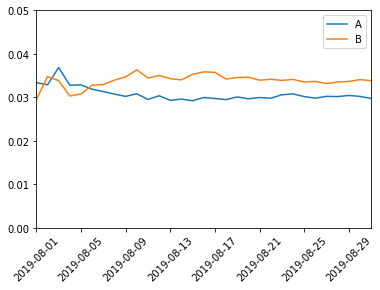

In [26]:
# cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# filtering data for group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# filtering data for group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# visualizing
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

At the beginning of the test group A had a higher conversion rate, but after roughly the first week the conversion rate of segment B increased, stayed at about the same value and remained steadily higher than that of group A until the end of the test. 

(18109.0, 18138.0, -0.5, 0.5)

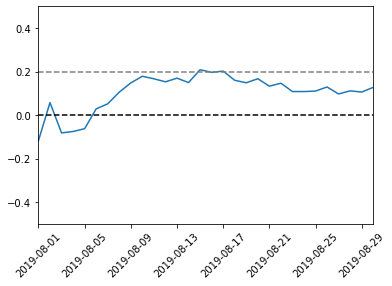

In [27]:
# plotting merged conversions

mergedCumulativeConversions = cumulativeDataA[["date", "conversion"]].merge(cumulativeDataB[["date", "conversion"]], left_on = "date", right_on = "date", how="left", suffixes=["A", "B"])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color="black", linestyle="--")
plt.axhline(y=0.2, color="grey", linestyle="--")
plt.xticks(rotation=45)
plt.axis(["2019-08-01", '2019-08-30', -0.5, 0.5])


Segment B also leads almost throughout the entire test. At the same time, it can be noted that the peak of the gap falls in the middle of the period, and towards the end of the month the gap narrows and amounts to ca. 15%.

In [28]:
# users with most orders

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


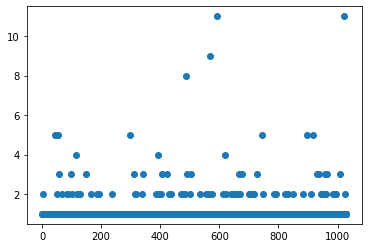

In [29]:
# scatterplot for the number of orders per user

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

Most users make 1 order. The number of users with more than 2 orders is also small. Finally, there are clear outliers with 8 orders or more.

In [30]:
# the number of orders for the 90th, 95th and 99th percentiles

np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

No more than 5% of users make more than 2 orders, and no more than 1% make more than 4 orders. For the next steps, we will take as abnormal users those who made 3 orders or more.

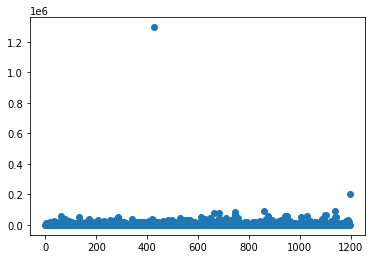

In [31]:
# scatterplot for the prices of orders

x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue']);

There are 2 outliers: an order with a value of approx. 200,000 and 1,200,000.

In [32]:
# prices for the 90th, 95th and 99th percentiles

np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

No more than 5% of orders have a cost exceeding 28000, and no more than 1% have a cost exceeding 58233 rubles. For the next steps, let's take the revenue of the hundredth percentile as an abnormal value and filter it out of the dataframe. 

Let's formulate hypotheses on the average number of orders per visitor for the raw data:
- **H0**: there are no differences in the number of orders per visitor between groups A and B
- **H1**: there are differences in the number of orders per visitor between groups A and B.

Significance level α = 0.05

In [33]:
# statistical significance of differences in the average number of orders per visitor between groups based on "raw" data

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACumulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACumulative.columns = ['date', 'visitorsCumulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCumulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCumulative.columns = ['date', 'visitorsCumulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACumulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACumulative.columns = [
    'date',
    'ordersCumulativeA',
    'revenueCumulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCumulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCumulative.columns = [
    'date',
    'ordersCumulativeB',
    'revenueCumulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACumulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCumulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Relative increase in the average number of Group B orders: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCumulativeA,revenueCumulativeA,ordersCumulativeB,revenueCumulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCumulativeA,visitorsCumulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


P-value: 0.01679
Relative increase in the average number of Group B orders: 0.138


P-value is less than 0.05 - we conclude that there are statistically significant differences in the average number of orders per visitor between the groups in the "raw" data. 

Let's formulate hypotheses on average check for raw data:
- **H0**: there is no difference in the average check between groups A and B
- **H1**: there are differences in the average check between groups A and B

Significance level α = 0.05

In [34]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Relative check differences between groups: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Relative check differences between groups: 0.259


P-value is greater than 0.05 - we conclude that there are no statistically significant differences between the groups in the "raw" data. The relative difference of the check between the groups is ca. 26%.

In [35]:
# variables that will filter out outliers in the number of orders and revenue
outlier_orders = np.percentile(ordersByUsers['orders'], 99)
outlier_revenues = np.percentile(orders['revenue'], 99)

In [36]:
# abnormalUsers table with outliers from users

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > outlier_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > outlier_orders]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > outlier_revenues]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head(5)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64

Let's formulate similar hypotheses for the average number of orders per visitor for the filtered data:
- **H0**: there are no differences in the number of orders per visitor between groups A and B
- **H1**: there are differences in the number of orders per visitor between groups A and B.

Significance level α = 0.05

In [37]:
# statistical significance of differences in the average number of orders per visitor between groups on "clean" data

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Relative growth in the average number of Group B orders in the cleaned data: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.01438
Relative growth in the average number of Group B orders in the cleaned data: 0.153


The P-value is again less than 0.05 - we conclude that there are also statistically significant differences in the average number of orders per visitor between the groups in the "cleaned" data. 

Let's formulate similar hypotheses on the average check for the filtered data:
- **H0**: there are no differences in the average check between groups A and B
- **H1**: there are differences in the average check between groups A and B.

Significance level α = 0.05


In [38]:
#  statistical significance of differences in average check between groups based on "clean" data
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Relative check differences between groups: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.851
Relative check differences between groups: -0.006


P-value is greater than 0.05 - we conclude that there are no statistically significant differences between the groups in the "cleaned" data. At the same time, the relative difference of the check between the groups has decreased and is ca. 0,2%.

## Interpreting the results of the test

Based on the A/B test conducted, it is recommended that the test be stopped with Group B as the winner of the test.

This decision is based on the following findings of the study:

1. The conversion rate of group B was consistently higher than that of group A almost throughout the entire test. Statistical significance in the difference in the average number of orders per visitor was found in both raw and cleaned data.

2. No statistical significance was found in the differences in the average check in either the raw or cleaned data. 